In [47]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target==2)

svm_clf = make_pipeline(StandardScaler(), 
                        LinearSVC(C=1, random_state=42))
svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [48]:
X_new = [[5.5, 2.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [49]:
svm_clf.decision_function(X_new)

array([ 2.90887886, -0.22036063])

In [50]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10000, random_state=42)
)
polynomial_svm_clf.fit(X, y)
polynomial_svm_clf['linearsvc'].coef_

array([[ 0.        , -0.90253479, -0.3728471 , -4.19321923, -0.49846487,
         0.68212693,  6.58255005, -0.50824401,  0.77497688, -2.14418599]])

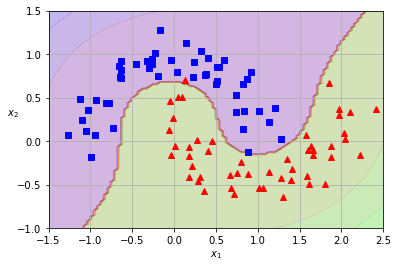

In [51]:
import matplotlib.pyplot as plt
import numpy as np

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r^')
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s,x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0,x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

axes = [-1.5, 2.5, -1, 1.5]
plot_predictions(polynomial_svm_clf, axes)
plot_dataset(X, y, axes)



In [52]:
from sklearn.svm import SVC

poly_kernal_svc_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=5)
)
poly_kernal_svc_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

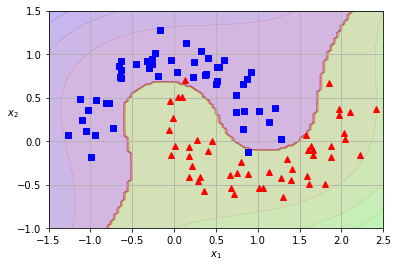

In [53]:
plot_predictions(poly_kernal_svc_clf, axes)
plot_dataset(X,y,axes)

In [54]:
# With Gaussian RBF Kernal

rbf_kernal_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", gamma=5, C=0.001)
)

rbf_kernal_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

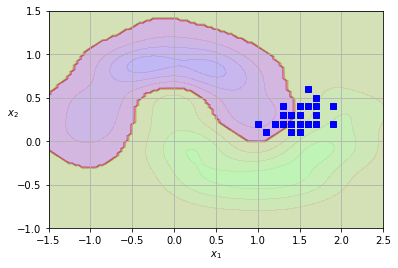

In [59]:
plot_dataset(X, y, axes)
plot_predictions(rbf_kernal_svm_clf, axes)

In [81]:
iris = load_iris(as_frame=True)
print(iris.target.unique(), iris.target_names)

X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)

X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
print(X[:5])

[0 1 2] ['setosa' 'versicolor' 'virginica']
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [89]:
# Linear SVC first
from sklearn.linear_model import SGDClassifier

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linear_svc_clf = LinearSVC(loss='hinge', C=10, random_state=42).fit(X_scaled, y)
svc_clf = SVC(kernel='linear', C=10).fit(X_scaled, y)
sgd_clf = SGDClassifier(loss='hinge', alpha=0.05).fit(X_scaled, y)


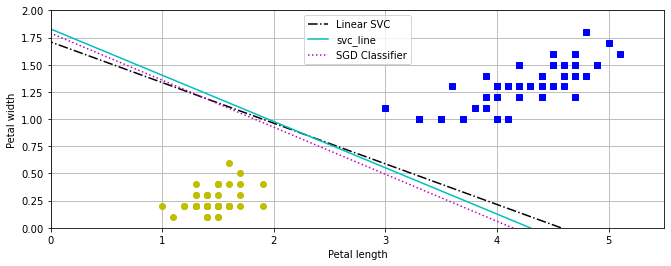

In [94]:
def decision_boundary(model):
    w = -model.coef_[0,0] / model.coef_[0,1]
    b = -model.intercept_ / model.coef_[0,1]
    return scaler.inverse_transform([[-5,-5*w + b], [5, 5*w + b]])

linear_svc_line = decision_boundary(linear_svc_clf)
svc_line = decision_boundary(svc_clf)
sgd_clf_line = decision_boundary(sgd_clf)

plt.figure(figsize=(11, 4))
plt.plot(linear_svc_line[:, 0], linear_svc_line[:, 1], 'k-.', label='Linear SVC')
plt.plot(svc_line[:,0], svc_line[:,1], 'c-', label='svc_line')
plt.plot(sgd_clf_line[:,0], sgd_clf_line[:,1], 'm:', label="SGD Classifier")
plt.plot(X[:,0][y==1], X[:,1][y==1], "bs")
plt.plot(X[:,0][y==0], X[:,1][y==0], "yo")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.grid()
plt.show()